# Assignment8

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import itertools

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
df = pd.read_csv("car_data.csv")

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
x = df[['Mileage']]
y = df[['Price']]

In [5]:
linr = linear_model.LinearRegression()
linr.fit(x,y)

LinearRegression()

In [6]:
print('Intercept:',linr.intercept_[0])
print('Coefficients:',linr.coef_[0])
print('R-Squared:',linr.score(x,y))

Intercept: 24764.559006061685
Coefficients: [-0.1725205]
R-Squared: 0.02046344732348926


Text(0.5, 1.0, 'Mileage vs Price')

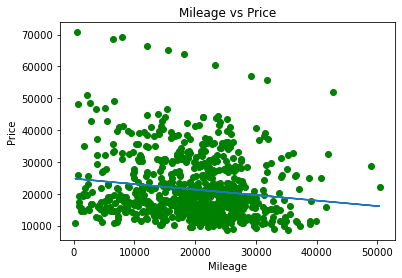

In [8]:
plt.scatter(x, y, color='g')
plt.plot(x, linr.predict(x))
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price')

In [9]:
cols = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
x = df[cols]
y = df[['Price']]

In [10]:
linr = linear_model.LinearRegression()
linr.fit(x, y)
print('Intercept:', linr.intercept_)
print('Coefficients:', linr.coef_)

Intercept: [6758.7551436]
Coefficients: [[-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
   6.28899715e+03 -1.99379528e+03  3.34936162e+03]]


In [11]:
print('R-Squared: ', linr.score(x, y))

R-Squared:  0.446264353672838


In [14]:
combos = [list(itertools.combinations(cols, sz)) for sz in range(1, 7)]
combos = list(itertools.chain.from_iterable(combos))
combo_combo = [list(x) for x in combos]
regrs = [linear_model.LinearRegression() \
         .fit(np.array(df[cols]), np.array(df[['Price']]))
         for cols in combo_combo]
score_sort = sorted(list(zip(combo_combo, regrs)), key=lambda x: 
                    x[1].score(np.array(df[x[0]]), 
                               np.array(df[['Price']])), 
                    reverse=True)

In [15]:
for x in score_sort[:]:
    print(str(round(x[1].score(np.array(df[x[0]]), np.array(df[['Price']])), 4)).ljust(6, '0'), x[0])

0.4457 ['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather']
0.4378 ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Leather']
0.4369 ['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Leather']
0.4301 ['Mileage', 'Cylinder', 'Liter', 'Cruise', 'Sound', 'Leather']
0.4300 ['Mileage', 'Cylinder', 'Cruise', 'Sound', 'Leather']
0.4265 ['Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
0.4258 ['Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather']
0.4248 ['Mileage', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
0.4244 ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound']
0.4241 ['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound']
0.4225 ['Mileage', 'Cylinder', 'Liter', 'Cruise', 'Leather']
0.4225 ['Mileage', 'Cylinder', 'Cruise', 'Leather']
0.4197 ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise']
0.4191 ['Mileage', 'Cylinder', 'Doors', 'Cruise']
0.4188 ['Cylinder', 'Liter', 'Doors', 'Cruise', 'Leather']
0.4178 ['Cylinder', 'Doors', 'Cruise', 'Leather']
0.4165 ['Mileage

In [16]:
df_2 = df.copy()

df_make = pd.get_dummies(df['Make'])
df_2[list(df_make.columns)] = df_make
df_2.pop('Make')

df_model = pd.get_dummies(df['Model'])
df_2[list(df_model.columns)] = df_model

df_type = pd.get_dummies(df['Type'])
df_2[list(df_type.columns)] = df_type
df_2.pop('Type')

pd.set_option('display.max_columns', None)
df_2 = df_2.drop(['Trim'],axis=1) #Trim has been removed for this scenario

df_2.head()

,Price,Mileage,Model,Cylinder,Liter,Doors,Cruise,Sound,Leather,Buick,Cadillac,Chevrolet,Pontiac,SAAB,Saturn,9-2X AWD,9_3,9_3 HO,9_5,9_5 HO,AVEO,Bonneville,CST-V,CTS,Cavalier,Century,Classic,Cobalt,Corvette,Deville,G6,GTO,Grand Am,Grand Prix,Impala,Ion,L Series,Lacrosse,Lesabre,Malibu,Monte Carlo,Park Avenue,STS-V6,STS-V8,Sunfire,Vibe,XLR-V8,Convertible,Coupe,Hatchback,Sedan,Wagon
0,17314.103129,8221,Century,6,3.1,4,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,17542.036083,9135,Century,6,3.1,4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,16218.847862,13196,Century,6,3.1,4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,16336.913140,16342,Century,6,3.1,4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,16339.170324,19832,Century,6,3.1,4,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [17]:
cols2 = list(df_2)
cols2.remove('Price')
len(cols2)

51

In [18]:
x = df_2[cols2]
y = df_2[['Price']]

In [19]:
columns = list(df_make.columns)
columns.extend(df_model.columns)
columns.extend(df_type.columns)
input_cols = []
for item in columns:
    input_cols.append([item])
input_cols

addi = []
for item in input_cols:
    for i in item:
        addi.append(i)
addition_features = pd.DataFrame({'Feature': addi})
addition_features

,Feature
0,Buick
1,Cadillac
2,Chevrolet
3,Pontiac
4,SAAB
5,Saturn
6,9-2X AWD
7,9_3
8,9_3 HO
9,9_5


In [20]:
cols3 = cols + ['Cadillac', 'Convertible', 'Chevrolet']
combos3 = [list(itertools.combinations(cols3, sz)) for sz in range(1, 10)]
combos3 = list(itertools.chain.from_iterable(combos3))
combo_combo3 = [list(x) for x in combos3]
regrs3 = [linear_model.LinearRegression() \
         .fit(np.array(df_2[cols]), np.array(df_2[['Price']]))
         for cols in combo_combo3]
score_sort3 = sorted(list(zip(combo_combo3, regrs3)), key=lambda x: 
                    x[1].score(np.array(df_2[x[0]]), 
                               np.array(df_2[['Price']])), 
                    reverse=True)

In [21]:
for x in score_sort3[:10]:
    print(str(round(x[1].score(np.array(df_2[x[0]]), np.array(df_2[['Price']])), 4)).ljust(6, '0'), x[0])

0.8300 ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Leather', 'Cadillac', 'Convertible', 'Chevrolet']
0.8268 ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Cadillac', 'Convertible', 'Chevrolet']
0.8268 ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Cadillac', 'Convertible', 'Chevrolet']
0.8264 ['Mileage', 'Cylinder', 'Liter', 'Cruise', 'Sound', 'Leather', 'Cadillac', 'Convertible', 'Chevrolet']
0.8262 ['Mileage', 'Cylinder', 'Liter', 'Cruise', 'Leather', 'Cadillac', 'Convertible', 'Chevrolet']
0.8231 ['Mileage', 'Cylinder', 'Liter', 'Cruise', 'Sound', 'Cadillac', 'Convertible', 'Chevrolet']
0.8231 ['Mileage', 'Cylinder', 'Liter', 'Cruise', 'Cadillac', 'Convertible', 'Chevrolet']
0.8173 ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Sound', 'Leather', 'Cadillac', 'Convertible', 'Chevrolet']
0.8172 ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Leather', 'Cadillac', 'Convertible', 'Chevrolet']
0.8149 ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Sound', 'Cadillac', 'Con